# Predict Credit Default

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('../data/hmeq.csv')

In [3]:
df.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
list(df)

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 456.,  415.,  696., 1003., 1093.,  629.,  596.,  394.,  148.,
          15.]),
 array([0.        , 0.64031242, 1.28062485, 1.92093727, 2.56124969,
        3.20156212, 3.84187454, 4.48218697, 5.12249939, 5.76281181,
        6.40312424]),
 <a list of 10 Patch objects>)

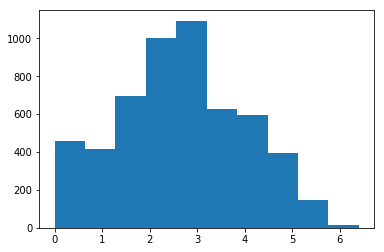

In [4]:
plt.hist(np.sqrt(df['YOJ']))

(array([1896., 1182.,  913.,  557.,  340.,  290.,  177.,   73.,   14.,
           3.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <a list of 10 Patch objects>)

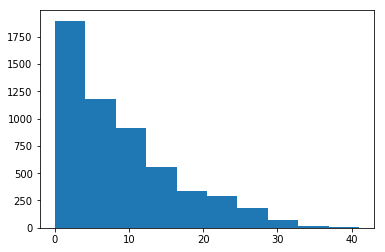

In [5]:
plt.hist(df['YOJ'])

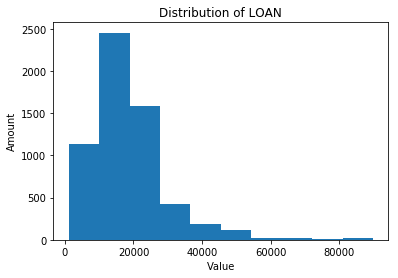

In [17]:
import matplotlib.pyplot as plt 

ax = df.LOAN.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of LOAN');

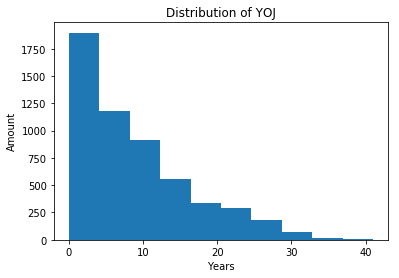

In [18]:
import matplotlib.pyplot as plt 

ax = df.YOJ.plot.hist()
ax.set_xlabel('Years')
ax.set_ylabel('Amount')
plt.title('Distribution of YOJ');

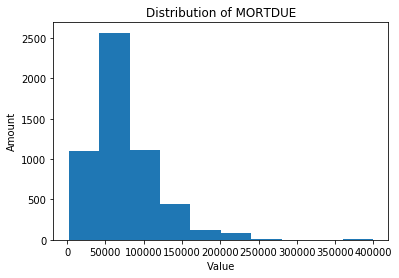

In [16]:
import matplotlib.pyplot as plt 

ax = df.MORTDUE.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of MORTDUE');

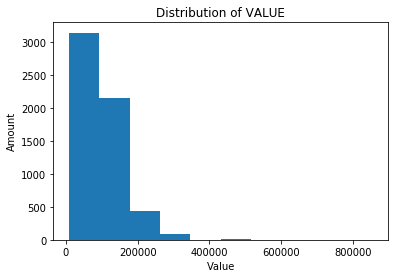

In [15]:
import matplotlib.pyplot as plt 

ax = df.VALUE.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of VALUE');

In [7]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

def fill_na_model(df, target):
    
    df_ = df.copy()
    
    X = df_.drop(['BAD', 'DEROG', 'DELINQ'], axis=1)
    y = df_[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clf = GradientBoostingRegressor(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return clf


def predict_na(df, target, clf=None):
    
    df_ = df.copy()
    
    df_train = df_[~df_[target].isna()]
    df_test = df_[df_[target].isna()]
    df_test_ = df_test.drop(columns=['BAD', 'DEROG', 'DELINQ'], axis=1)
    
    if clf == None:
        clf = fill_na_model(df_train, target)
        
    y_pred = clf.predict(df_test_)
    df_test[target] = y_pred
    df_new = pd.concat([df_train, df_test])
    
    return df_new, clf
    

In [10]:
def dummy_replace(df, column, prefix=None):
    
    df_ = df.copy()
    
    df_dummy = pd.get_dummies(df_[column], prefix=prefix)
    df_ = pd.concat([df_, df_dummy], axis=1)
    df_ = df_.drop(columns=[column], axis=1)
    
    return df_
   
def fill_nan(df): 
    
    df_ = df.copy()
    
    df_['MORTDUE'] = df_['MORTDUE'].fillna(df_['MORTDUE'].median())
    df_['VALUE'] = df_['VALUE'].fillna(df_['VALUE'].median())
    df_['REASON'] = df_['REASON'].fillna('Unknown')
    df_['JOB'] = df_['JOB'].fillna('Unknown')
    df_['YOJ'] = df_['YOJ'].fillna(df_['YOJ'].median())
    df_['CLAGE'] = df_['CLAGE'].fillna(df_['CLAGE'].median())
    df_['NINQ'] = df_['NINQ'].fillna(df_['NINQ'].median()) 
    df_['CLNO'] = df_['CLNO'].fillna(df_['CLNO'].median()) 
    df_['DEBTINC'] = df_['DEBTINC'].fillna(df_['DEBTINC'].median()) 
    
#     df_['DEROG'] = df_['DEROG'].fillna(df_['DEROG'].mean()) 
#     df_['DELINQ'] = df_['DELINQ'].fillna(df_['DELINQ'].mean()) 
    
    return df_

def feature_engineering(df):
    
    df_ = df.copy()
    
    df_['LOAN'] = np.log(df_['LOAN'])
    df_['MORTDUE'] = np.log(df_['MORTDUE'])
    df_['VALUE'] = np.log(df_['VALUE'])
    df_['YOJ'] = np.sqrt(df_['YOJ'])
    
    return df_


def data_cleaning(df, clf=None):
    
    df_ = df.copy()
    df_ = fill_nan(df_)
    df_ = feature_engineering(df_)

    df_ = dummy_replace(df_, 'REASON', prefix='Reason')
    df_ = dummy_replace(df_, 'JOB', prefix='Job')
    
    df_, clf_derog = predict_na(df_, 'DEROG', clf=clf)
    df_, clf_delinq = predict_na(df_, 'DELINQ', clf=clf)
    
    return df_

In [11]:
df_ = data_cleaning(df)

C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\srema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


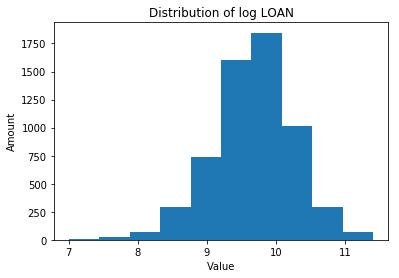

In [19]:
import matplotlib.pyplot as plt 

ax = df_.LOAN.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of log LOAN');

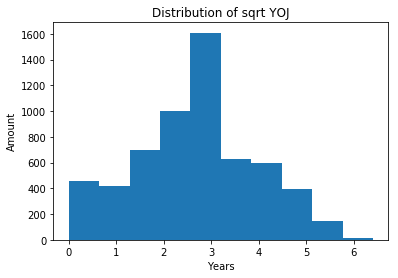

In [20]:
import matplotlib.pyplot as plt 

ax = df_.YOJ.plot.hist()
ax.set_xlabel('Years')
ax.set_ylabel('Amount')
plt.title('Distribution of sqrt YOJ');

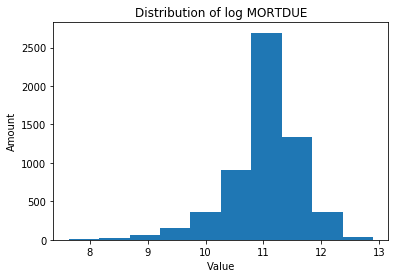

In [21]:
import matplotlib.pyplot as plt 

ax = df_.MORTDUE.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of log MORTDUE');

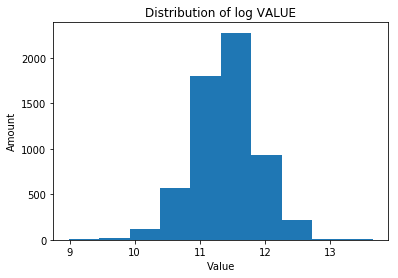

In [22]:
import matplotlib.pyplot as plt 

ax = df_.VALUE.plot.hist()
ax.set_xlabel('Value')
ax.set_ylabel('Amount')
plt.title('Distribution of log VALUE');

In [10]:
df_.head(5)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,Reason_DebtCon,Reason_HomeImp,Reason_Unknown,Job_Mgr,Job_Office,Job_Other,Job_ProfExe,Job_Sales,Job_Self,Job_Unknown
0,1,7.003065,10.160453,10.571958,3.240370,0.0,0.0,94.366667,1.0,9.0,...,0,1,0,0,0,1,0,0,0,0
1,1,7.170120,11.157007,11.133128,2.645751,0.0,2.0,121.833333,0.0,14.0,...,0,1,0,0,0,1,0,0,0,0
2,1,7.313220,9.510445,9.723164,2.000000,0.0,0.0,149.466667,1.0,10.0,...,0,1,0,0,0,1,0,0,0,0
4,0,7.438384,11.490680,11.626254,1.732051,0.0,0.0,93.333333,0.0,14.0,...,0,1,0,0,1,0,0,0,0,0
5,1,7.438384,10.327054,10.604603,3.000000,0.0,0.0,101.466002,1.0,8.0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
import random

class EnsembleModel():
    
    def __init__(self, solver='lbfgs', random_state=42, test_size=0.33, sample_frac=0.8, rounds=100,
                row_sampling=True, max_iter=100):
        
        self.solver = solver
        self.random_state = random_state
        self.test_size = test_size
        self.sample_frac = sample_frac
        self.rounds = rounds
        self.max_iter = max_iter
        self.row_sampling = row_sampling
        
        random.seed(self.random_state)
    
    
    def sample_rows(self, X, y, random_state):
        
        no_sample_rows = int(self.rows * self.sample_frac)
        row_indices = list(range(self.rows))
        
        X_rows = random.choices(row_indices, k=no_sample_rows)
        X_sample = np.zeros((no_sample_rows,X.shape[1]))
        y_sample = np.zeros((no_sample_rows,))
        
        for i, row in enumerate(X_rows):
            X_sample[i,:] = X[row,:]
            y_sample[i] = y[row]
            
        return X_sample, y_sample
        
    
    def sample_columns(self, X, y, random_state):
        
        random.seed(random_state)
        
        no_sample_cols = int(self.cols * self.sample_frac)
        column_indices = list(range(self.cols))
        
        X_cols = random.sample(column_indices, no_sample_cols)
        X_sample = X[:, X_cols]
        
        if self.row_sampling == True:
            X_sample, y_sample = self.sample_rows(X_sample, y, random_state)
        else:
            y_sample = y

        return X_sample, y_sample, X_cols
    
        
    
    def fit(self, X, y):
        
        self.rows = X.shape[0]
        self.cols = X.shape[1]
        
        X = X.values
        y = y.values
        
        self.__clf_dict = {}
        
        for i in range(self.rounds):
            X_sample, y_sample, X_cols = self.sample_columns(X, y,random_state=i)
            
            clf = LogisticRegression(solver=self.solver, random_state=self.random_state, 
                                     max_iter=self.max_iter)
            clf.fit(X_sample, y_sample)
            self.__clf_dict[i] = [clf, X_cols]
        
        return None
    
    
    def predict(self, X):
        
        X = X.values        
        y_pred_mat = np.zeros((len(X), self.rounds))
        
        for key, value in self.__clf_dict.items():
            model = value[0]
            cols = value[1]
            y_pred_mat[:,key] = model.predict(X[:,cols])
            
        y_pred = np.mean(y_pred_mat, axis=1)
        
        return y_pred, y_pred_mat

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df_.drop(['BAD'], axis=1)
y = df_['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = EnsembleModel(row_sampling=False, random_state=42, rounds=250, max_iter=100)
# clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
# y_pred =  clf.predict(X_test)
y_pred, y_pred_mat =  clf.predict(X_test)

clf = LogisticRegression(random_state=42)
clf.fit(y_pred_mat, y_test)
y_pred_ens = clf.predict(y_pred_mat)

C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
y_pred_int = y_pred.copy()

for i in range(len(y_pred_int)):
    if y_pred_int[i] > 0:
        y_pred_int[i] = 1
    else:
        y_pred_int[i] = 0
        
y_pred_int = y_pred_int.astype(int)

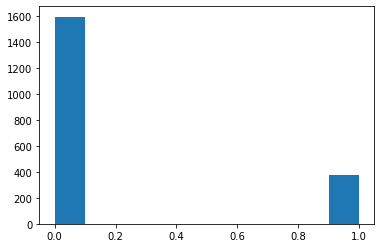

In [23]:
import matplotlib.pyplot as plt

plt.hist(y_test);

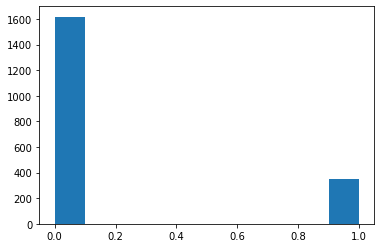

In [24]:
plt.hist(y_pred_int);

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def model_performance(y_test, y_pred, model_name):
    
    print('Model:', model_name)
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))
    print('Precision score:', precision_score(y_test, y_pred))
    print('Recall score:', recall_score(y_test, y_pred))
    

In [ ]:
model_performance(y_test, y_pred_int, 'Ensemble Logit Mean Prediction')

In [ ]:
model_performance(y_test, y_pred_ens, 'Ensemble Logit Model Prediction')

In [26]:
model_performance(y_test, y_pred_int, 'Ensemble Logit Mean Prediction')

Model: Ensemble Logit Mean Prediction
Accuracy score: 0.8246059989832232
F1 score: 0.5228215767634854
Precision score: 0.54
Recall score: 0.5067024128686327


In [27]:
model_performance(y_test, y_pred_ens, 'Ensemble Logit Model Prediction')

Model: Ensemble Logit Model Prediction
Accuracy score: 0.8815455007625826
F1 score: 0.5890652557319224
Precision score: 0.8608247422680413
Recall score: 0.4477211796246649


In [20]:
model_performance(y_test, y_pred, 'Simple Logit')

Model: Simple Logit
Accuracy score: 0.845958312150483
F1 score: 0.45796064400715564
Precision score: 0.6881720430107527
Recall score: 0.34316353887399464


In [174]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_ens))
print('F1 score:', f1_score(y_test, y_pred_ens))
print('Precision score:', precision_score(y_test, y_pred_ens))
print('Recall score:', recall_score(y_test, y_pred_ens))

Accuracy score: 0.8815455007625826
F1 score: 0.5890652557319224
Precision score: 0.8608247422680413
Recall score: 0.4477211796246649


In [154]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_ens))
print('F1 score:', f1_score(y_test, y_pred_ens))
print('Precision score:', precision_score(y_test, y_pred_ens))
print('Recall score:', recall_score(y_test, y_pred_ens))

Accuracy score: 0.85866802236909
F1 score: 0.545751633986928
Precision score: 0.9277777777777778
Recall score: 0.38657407407407407


In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_ens))
print('F1 score:', f1_score(y_test, y_pred_ens))
print('Precision score:', precision_score(y_test, y_pred_ens))
print('Recall score:', recall_score(y_test, y_pred_ens))

Accuracy score: 0.8576512455516014
F1 score: 0.5512820512820513
Precision score: 0.8958333333333334
Recall score: 0.39814814814814814


In [156]:
print('----------------------')

----------------------


In [175]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_int))
print('F1 score:', f1_score(y_test, y_pred_int))
print('Precision score:', precision_score(y_test, y_pred_int))
print('Recall score:', recall_score(y_test, y_pred_int))

Accuracy score: 0.8246059989832232
F1 score: 0.5228215767634854
Precision score: 0.54
Recall score: 0.5067024128686327


In [155]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_int))
print('F1 score:', f1_score(y_test, y_pred_int))
print('Precision score:', precision_score(y_test, y_pred_int))
print('Recall score:', recall_score(y_test, y_pred_int))

Accuracy score: 0.8103711235383834
F1 score: 0.51994851994852
Precision score: 0.5855072463768116
Recall score: 0.4675925925925926


In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_int))
print('F1 score:', f1_score(y_test, y_pred_int))
print('Precision score:', precision_score(y_test, y_pred_int))
print('Recall score:', recall_score(y_test, y_pred_int))

Accuracy score: 0.8078291814946619
F1 score: 0.5190839694656489
Precision score: 0.576271186440678
Recall score: 0.4722222222222222


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_int))
print('F1 score:', f1_score(y_test, y_pred_int))
print('Precision score:', precision_score(y_test, y_pred_int))
print('Recall score:', recall_score(y_test, y_pred_int))

Accuracy score: 0.8124046771733604
F1 score: 0.4581497797356828
Precision score: 0.6265060240963856
Recall score: 0.3611111111111111


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred_int))
print('F1 score:', f1_score(y_test, y_pred_int))
print('Precision score:', precision_score(y_test, y_pred_int))
print('Recall score:', recall_score(y_test, y_pred_int))

Accuracy score: 0.813421453990849
F1 score: 0.4965706447187929
Precision score: 0.6094276094276094
Recall score: 0.41898148148148145


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.7819013726487036
F1 score: 0.0272108843537415
Precision score: 0.6666666666666666
Recall score: 0.013888888888888888
